# Does all the same but don't group data by session
ie, keep individual records

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the CSV file
catdog_df = pd.read_csv('final_catdog.csv')
catdog_mouse_df = pd.read_csv('final_catdog_mouse.csv')

In [53]:
# Compute proximity scores
proximity_df = pd.DataFrame()       # Columns: Session_Id, Condition, Incumbent

for index, row in catdog_df.iterrows():
    session_id = row['Session_Id']
    condition = row['Condition']
    participant_id = row['Participant_Id']
    incumbent = row['Connectedness']
    proximity_df = pd.concat([proximity_df, 
                              pd.DataFrame({
                                  'Session_Id': [session_id], 
                                  'Condition': [condition], 
                                  'Participant_Id': [participant_id],
                                  'Incumbent': [incumbent]})])

for index, row in catdog_mouse_df.iterrows():
    participant_id = row['Participant_Id']
    newcomer = row['Connectedness']
    # Match the participant_id
    proximity_df.loc[proximity_df['Participant_Id'] == participant_id, 'Newcomer'] = newcomer

proximity_df.reset_index(drop=True, inplace=True)
proximity_df

,Session_Id,Condition,Participant_Id,Incumbent,Newcomer
0,1,0,CAT1DS,3.50,3.25
1,1,0,DOG1DS,4.75,3.00
2,2,1,DOG2DS,4.25,2.75
3,2,1,CAT2DS,6.00,1.50
4,3,0,DOG3DS,3.00,2.75
5,3,0,CAT3DS,4.25,2.25
6,4,1,CAT4DS,3.50,2.00
7,4,1,DOG4DS,1.50,1.00
8,5,0,DOG5DS,4.50,4.25
9,5,0,CAT5DS,3.00,2.25


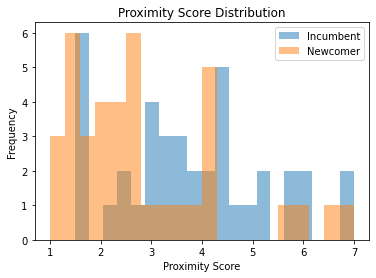

In [54]:
# Plot the histogram
incumbent = proximity_df['Incumbent'].values
newcomer = proximity_df['Newcomer'].values

plt.hist(incumbent, bins=20, alpha=0.5, label='Incumbent')
plt.hist(newcomer, bins=20, alpha=0.5, label='Newcomer')
plt.legend(loc='upper right')
plt.xlabel('Proximity Score')
plt.ylabel('Frequency')
plt.title('Proximity Score Distribution')
plt.show()

/var/folders/p3/pw0cdvjd4sd0mt4q8wywq38c0000gn/T/ipykernel_73190/2795340624.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(incumbent, label='Incumbent', shade=True)
/var/folders/p3/pw0cdvjd4sd0mt4q8wywq38c0000gn/T/ipykernel_73190/2795340624.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(newcomer, label='Newcomer', shade=True)


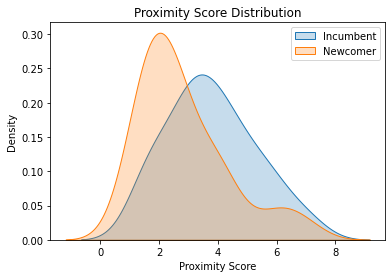

In [55]:
import seaborn as sns

# Plot kernel density estimate (smooth curve)
sns.kdeplot(incumbent, label='Incumbent', shade=True)
sns.kdeplot(newcomer, label='Newcomer', shade=True)
plt.xlabel('Proximity Score')
plt.ylabel('Density')
plt.title('Proximity Score Distribution')
# Legend
plt.legend(loc='upper right')
plt.show()

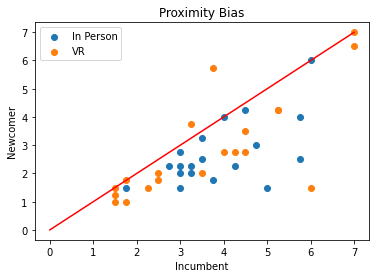

In [56]:
# Proximity bias scatter plot

# Plot y=x line
x = np.linspace(0, 7, 100)
plt.plot(x, x, color='red')

# Scatter plot of Incumbent vs Newcomer where condition = 0
plt.scatter(proximity_df[proximity_df['Condition'] == 0]['Incumbent'], proximity_df[proximity_df['Condition'] == 0]['Newcomer'], label='In Person')
# Scatter plot of Incumbent vs Newcomer where condition = 1
plt.scatter(proximity_df[proximity_df['Condition'] == 1]['Incumbent'], proximity_df[proximity_df['Condition'] == 1]['Newcomer'], label='VR')
plt.xlabel('Incumbent')
plt.ylabel('Newcomer')
plt.title('Proximity Bias')
plt.legend(loc='upper left')
plt.show()


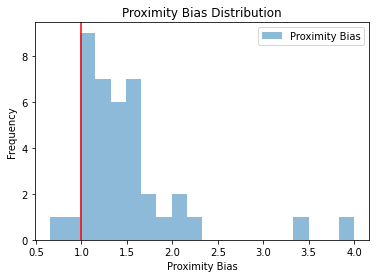

In [57]:
# proximity_bias_df computes the ratio of catdog_df to catdogmouse_df
proximity_bias_df = catdog_df.copy()
# Keep Session_Id and Condition unchanged
proximity_bias_df.drop(columns=['Session_Id', 'Condition', 'Participant_Id'], inplace=True)
# Divide each column by the corresponding column in catdogmouse_df
for column in proximity_bias_df.columns:
    proximity_bias_df[column] = proximity_bias_df[column] / catdog_mouse_df[column]
proximity_bias_df.rename(columns={"Connectedness":"Proximity_Bias"}, inplace=True)
# Add Session_Id and Condition and Participant_Id back
proximity_bias_df['Session_Id'] = catdog_df['Session_Id']
proximity_bias_df['Condition'] = catdog_df['Condition'].astype(int)
proximity_bias_df['Participant_Id'] = catdog_df['Participant_Id']

# Plot the histogram
proximity_bias = proximity_bias_df['Proximity_Bias'].values
plt.hist(proximity_bias, bins=20, alpha=0.5, label='Proximity Bias')
plt.legend(loc='upper right')
plt.xlabel('Proximity Bias')
plt.ylabel('Frequency')
plt.title('Proximity Bias Distribution')
# Plot x=1 line
plt.axvline(x=1, color='red')
plt.show()

proximity_bias_df.to_csv('proximity_bias.csv', index=False)

/var/folders/p3/pw0cdvjd4sd0mt4q8wywq38c0000gn/T/ipykernel_73190/22203807.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(proximity_bias, label='Proximity Bias', shade=True)


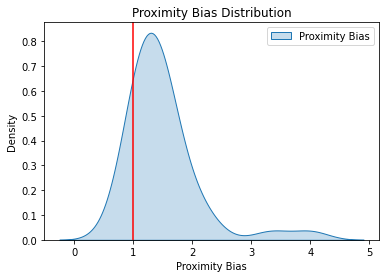

In [58]:
# Plot kernel density estimate (smooth curve)
sns.kdeplot(proximity_bias, label='Proximity Bias', shade=True)
plt.xlabel('Proximity Bias')
plt.ylabel('Density')
plt.title('Proximity Bias Distribution')
# Legend
plt.legend(loc='upper right')
# Plot x=1 line
plt.axvline(x=1, color='red')
plt.show()

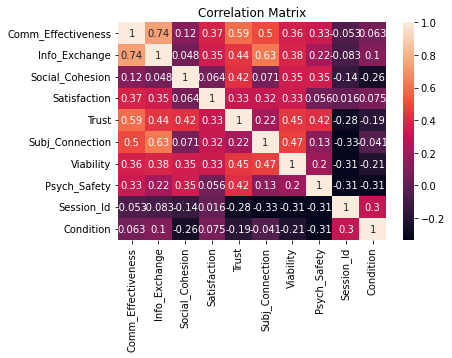

In [59]:
# Correlation matrix
corr = proximity_bias_df.drop(columns=['Proximity_Bias']).corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [60]:
import pandas as pd

environment_df = pd.read_csv('final_catdog_evaluation.csv')
environment_df.drop(columns=['Session_Id','Condition'], inplace=True)

# Merge proximity_bias_df and environment_df
merged_df = pd.merge(proximity_bias_df, environment_df, on='Participant_Id')
merged_df.to_csv('merged.csv', index=False)

In [61]:
# Normalize the columns of proximity_bias_df and merged_df
copy = proximity_bias_df.copy()
copy.drop(columns=['Session_Id', 'Condition', 'Participant_Id'], inplace=True)
copy = (copy - copy.mean()) / copy.std()
copy['Session_Id'] = proximity_bias_df['Session_Id']
copy['Condition'] = proximity_bias_df['Condition']
copy['Participant_Id'] = proximity_bias_df['Participant_Id']
copy.to_csv('proximity_bias_normalized.csv', index=False)

In [62]:
copy = merged_df.copy()
copy.drop(columns=['Session_Id', 'Condition', 'Participant_Id'], inplace=True)
copy = (copy - copy.mean()) / copy.std()
copy['Session_Id'] = merged_df['Session_Id']
copy['Condition'] = merged_df['Condition']
copy['Participant_Id'] = merged_df['Participant_Id']
copy.to_csv('merged_normalized.csv', index=False)